### K-means Clustering

Let's load the Iris data and assume for a moment that the species column is missing i.e., we have the measured values for sepal length/width and petal length/width but we do not know how many species exists.

Now let's use unsupervised learning i.e., clustering to find out how many species exists. The goal here is to group all similar items into a cluster.

In [1]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
#iris = datasets.load_wine()
print(iris)

# Let's convert to dataframe
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['species'])

# let's remove spaces from column name
iris.columns = iris.columns.str.replace(' ','')
iris.head()

X = iris.iloc[:,:3]  # independent variables
y = iris.species   # dependent variable


sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [2]:
# K Means Cluster
model = KMeans(n_clusters=3, random_state= 11, init = 'k-means++', max_iter=300)
model.fit(X)
print(model.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 2 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [3]:
# Since k-means unsupervised the labels have been assigned to the clusters 
# They are not quite line with the actual labels so let's convert all the 
# 1s to 0s and 0s to 1s, and leave the 2's. The 2's look fine.
iris['pred_species'] =  np.choose(model.labels_, [1, 0, 2]).astype(np.int64)

print("Accuracy :", metrics.accuracy_score(iris.species, iris.pred_species)*100)
print("Classification report : \n", metrics.classification_report(iris.species, iris.pred_species))

Accuracy : 80.66666666666666
Classification report : 
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        50
         1.0       0.71      0.70      0.71        50
         2.0       0.71      0.74      0.73        50

    accuracy                           0.81       150
   macro avg       0.81      0.81      0.81       150
weighted avg       0.81      0.81      0.81       150



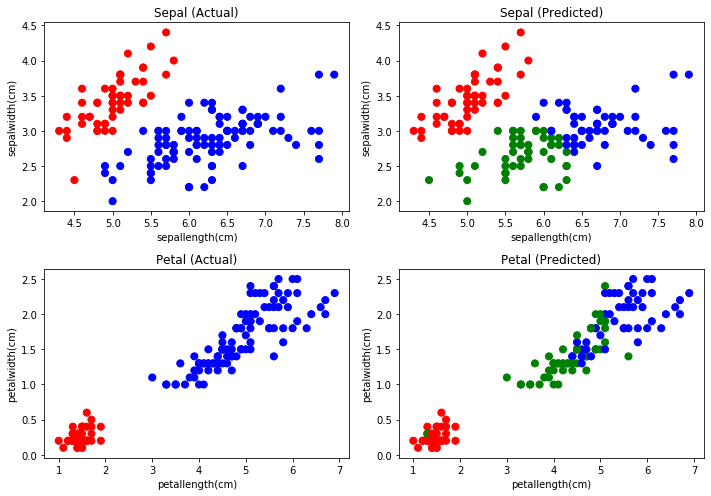

In [4]:
# Set the size of the plot
plt.figure(figsize=(10,7))
 
# Create a colormap for red = 0, green = 1 and blue = 2 to see how well k-means 
# did at clustering the data in agreement with the actual iris example labels
cmap = ListedColormap(['r', 'g', 'b'])

# Plot Sepal
plt.subplot(2, 2, 1)
plt.scatter(iris['sepallength(cm)'], iris['sepalwidth(cm)'], c=cmap(iris.species), marker='o', s=50)
plt.xlabel('sepallength(cm)')
plt.ylabel('sepalwidth(cm)')
plt.title('Sepal (Actual)')
 
plt.subplot(2, 2, 2)
plt.scatter(iris['sepallength(cm)'], iris['sepalwidth(cm)'], c=cmap(iris.pred_species), marker='o', s=50)
plt.xlabel('sepallength(cm)')
plt.ylabel('sepalwidth(cm)')
plt.title('Sepal (Predicted)')

plt.subplot(2, 2, 3)
plt.scatter(iris['petallength(cm)'], iris['petalwidth(cm)'], c=cmap(iris.species),marker='o', s=50)
plt.xlabel('petallength(cm)')
plt.ylabel('petalwidth(cm)')
plt.title('Petal (Actual)')

plt.subplot(2, 2, 4)
plt.scatter(iris['petallength(cm)'], iris['petalwidth(cm)'], c=cmap(iris.pred_species),marker='o', s=50)
plt.xlabel('petallength(cm)')
plt.ylabel('petalwidth(cm)')
plt.title('Petal (Predicted)')
plt.tight_layout()

### Finding value of K

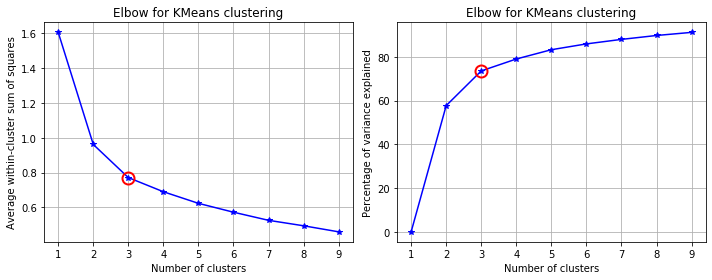

In [5]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

K = range(1,10)
KM = [KMeans(n_clusters=k,  init='k-means++', max_iter=300, tol=0.0001,algorithm = 'auto').fit(X) for k in K]
centroids = [k.cluster_centers_ for k in KM]

D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

# Total with-in sum of square
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(X)**2)/X.shape[0]
bss = tss-wcss
varExplained = bss/tss*100

kIdx = 10-1
##### plot ###
kIdx = 2

# elbow curve
# Set the size of the plot
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.plot(K, avgWithinSS, 'b*-')
plt.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

plt.subplot(1, 2, 2)
plt.plot(K, varExplained, 'b*-')
plt.plot(K[kIdx], varExplained[kIdx], marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for KMeans clustering')
plt.tight_layout()

### Average silhouette method

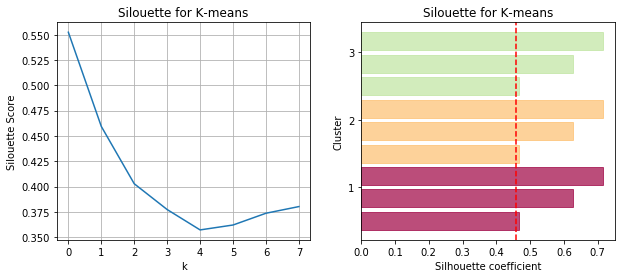

Silouette Score of K=3 is : 0.37728369797713324
Silouette averags is : 0.45943185768025824


In [6]:
from sklearn.metrics import silhouette_score
from matplotlib import cm

score = []
for n_clusters in range(2,10):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    score.append(silhouette_score(X, labels, metric='euclidean'))

    # Set the size of the plot
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.plot(score)
plt.grid(True)
plt.ylabel("Silouette Score")
plt.xlabel("k")
plt.title("Silouette for K-means")

# Initialize the clusterer with n_clusters value and a random generator
model = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=0)
model.fit_predict(X)
cluster_labels = np.unique(model.labels_) 
n_clusters = cluster_labels.shape[0]

# Compute the silhouette scores for each sample
silhouette_vals = silhouette_samples(X, model.labels_)

plt.subplot(1, 2, 2)

# Get spectral values for colormap.
cmap = cm.get_cmap("Spectral")

y_lower, y_upper = 0,0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[cluster_labels]
    c_silhouette_vals.sort()
    y_upper += len(c_silhouette_vals)
    color = cmap(float(i) / n_clusters)
    plt.barh(range(y_lower, y_upper), c_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)
    yticks.append((y_lower + y_upper) / 2)
    y_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)


plt.yticks(yticks, cluster_labels+1)

# The vertical line for average silhouette score of all the values
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title("Silouette for K-means")
plt.show()

print('Silouette Score of K=3 is :' ,score[3])
print('Silouette averags is :',silhouette_avg)

Rinda Digamarthi(157742d)